In [11]:
import pandas as pd
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [161]:
df = pd.read_csv('dataset.csv').drop('Unnamed: 0',axis=1)
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,class
0,0.026926,0.211189,0.075056,0.179532,0.121865,0.118529,0.144809,0.059208,0.129693,0.013166,...,0.124867,0.0,0.084490,0.009529,0.057020,0.022645,0.103716,0.030495,0.136325,0
1,0.028653,0.210765,0.076846,0.177180,0.122846,0.117856,0.144596,0.057485,0.129097,0.012203,...,0.125772,0.0,0.083449,0.009630,0.056307,0.023633,0.102898,0.031943,0.135311,0
2,0.026404,0.212341,0.074268,0.180378,0.122163,0.119740,0.145107,0.060148,0.128698,0.014557,...,0.126423,0.0,0.084410,0.010547,0.060463,0.022247,0.108153,0.029980,0.141910,0
3,0.026404,0.212341,0.074268,0.180378,0.122163,0.119740,0.145107,0.060148,0.128698,0.014557,...,0.126423,0.0,0.084410,0.010547,0.060463,0.022247,0.108153,0.029980,0.141910,0
4,0.027747,0.209456,0.075612,0.176561,0.121689,0.116988,0.142969,0.058841,0.125906,0.015016,...,0.124149,0.0,0.085814,0.007954,0.057932,0.018551,0.105050,0.027027,0.139705,0


In [162]:
#shuffling dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,class
0,0.019463,0.390913,0.085252,0.358925,0.130909,0.282113,0.161370,0.222087,0.144707,0.191308,...,0.247572,0.000000,0.204234,0.078136,0.246134,0.071532,0.292276,0.041060,0.291312,23
1,0.062842,0.531928,0.110904,0.536864,0.118448,0.488836,0.074919,0.426692,0.029897,0.368932,...,0.363663,0.033892,0.332592,0.000000,0.295094,0.003576,0.341363,0.020494,0.378142,21
2,0.127101,0.017162,0.165142,0.081141,0.172958,0.162821,0.151473,0.231054,0.118074,0.280184,...,0.126847,0.022366,0.000000,0.000000,0.123677,0.016162,0.109353,0.030081,0.076144,16
3,0.047536,0.296454,0.097896,0.242123,0.119982,0.155126,0.105033,0.080849,0.085237,0.026717,...,0.134393,0.002188,0.106589,0.000000,0.055513,0.008971,0.104536,0.016577,0.146985,12
4,0.107782,0.431937,0.175493,0.404696,0.233637,0.322175,0.283040,0.249352,0.331249,0.207801,...,0.282347,0.041324,0.210565,0.024411,0.118480,0.011165,0.059165,0.000000,0.000000,24


In [163]:
X = df.drop('class', axis=1)
y = df['class']

2579
2579


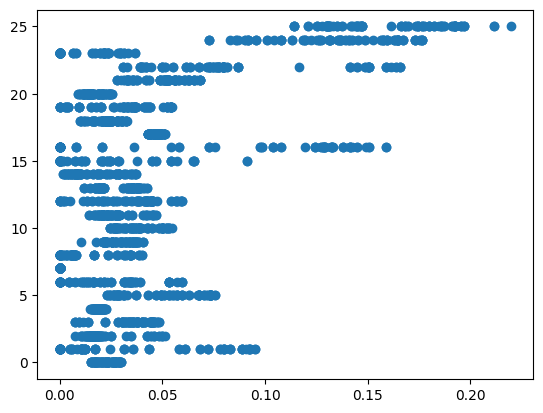

In [142]:
import matplotlib.pyplot as plt
print(len(X))
print(len(y))
plt.scatter(X['f0'], y)
plt.show()

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

X_pca = pca.fit_transform(X)

In [109]:
X_pca

array([[-0.33962986],
       [ 0.79600718],
       [-0.30797427],
       ...,
       [-0.35095279],
       [-0.37420995],
       [ 0.1032447 ]])

2579
2579


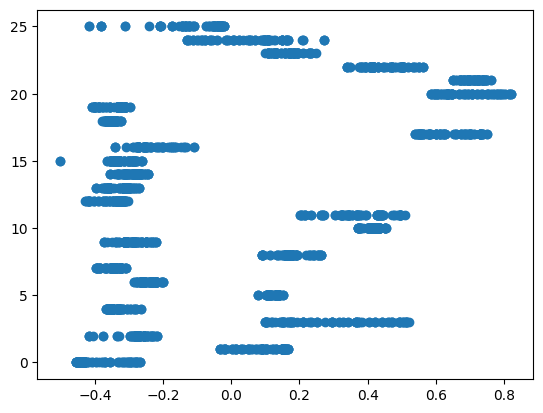

In [110]:
import matplotlib.pyplot as plt
print(len(X_pca))
print(len(y))
plt.scatter(X_pca,y)
plt.show()

In [125]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [144]:
rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
y_pred = rfModel.predict(X_test)

In [145]:
print(y_pred)
print(y_test)

[ 4 14 20 23 10 15  7  6  2 15 23  6 23 11 18 12 23 20 16 24 16 15 24  1
 21 20  9 20 13  1 16 17  1 16 20 21 10  5  9 24  5 25 21  8 11 12  1  3
 18 25  1 12  5 14  0  1 12  5 11 10 12 18 18 12 11 12 20 24 24 13  2 10
 24  3 25 21 23 14  4  4 22  7  3 17 25  6 16  8 10 22  3 17 12  3 15 11
 23  6 18 11  9 10 23  9  9  8 22 11 15 13 13  6  4  0 12 15 17  5 18  9
 21  8 21 14 23  9 15 22 21 16 24 18  3 18  8 19  6  1 21  8 23 21 21 14
  5  0  4  7  8  0  5 11  3  7  4 17 14  4  7 23  0 22  2 19 11  1  6 19
 23  8 15  6 13  4  0 17 22  5  1 17 16  8 25 25  1 11  2  9 23 14 24 20
 15 14  7 18  9  3 22  6 12 13  4  0  2  7 16  5 15 11  1  2  5 24 19  4
  0  7  7 13  2 14  0  8  0 22  2 25 14 15 16  5  4 13 13  2  5 11 13 11
  1 10  8 17  3  4 23  9 19 18 13 24 17  2 21  0 17  7  5  6 14 16 22  7
  7 14  1 21  0 22  4  9 23  6 15 21  0  5 15 20  2 24  5  7  4 24 12 10
 21 17  9 12 23 22 22  6 23  3 10 18  2  7  9 14 10  0 17 23  5 12  2 13
  7  2  9 16 19 17 20  6 25 25 18  7 16 20  8  0 25

In [146]:
score = accuracy_score(y_pred=y_pred,y_true=y_test)
print(f"Accuracy Score : {score*100}%")

Accuracy Score : 100.0%


In [147]:
import joblib

# save
joblib.dump(rfModel, "rfModel.joblib")

# load
# loaded_rf = joblib.load("my_random_forest.joblib")

['rfModel.joblib']

In [45]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

In [165]:
X.shape

(2579, 42)

In [164]:
y.shape

(2579,)

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# X_reshaped = X_normalized.reshape((X_normalized.shape[0], 7, 6, 1))


In [168]:
num_classes = 26
y_categorical = to_categorical(y, num_classes=num_classes)

print(X)
print(y_categorical)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

            f0        f1        f2        f3        f4        f5        f6  \
0     0.019463  0.390913  0.085252  0.358925  0.130909  0.282113  0.161370   
1     0.062842  0.531928  0.110904  0.536864  0.118448  0.488836  0.074919   
2     0.127101  0.017162  0.165142  0.081141  0.172958  0.162821  0.151473   
3     0.047536  0.296454  0.097896  0.242123  0.119982  0.155126  0.105033   
4     0.107782  0.431937  0.175493  0.404696  0.233637  0.322175  0.283040   
...        ...       ...       ...       ...       ...       ...       ...   
2574  0.136733  0.430724  0.198979  0.391779  0.243494  0.301922  0.280289   
2575  0.000000  0.436656  0.067513  0.423603  0.129977  0.360805  0.142400   
2576  0.016824  0.438756  0.070544  0.428573  0.110276  0.378280  0.113405   
2577  0.000000  0.396120  0.041288  0.386401  0.083226  0.334786  0.081156   
2578  0.135605  0.435010  0.204909  0.388872  0.254385  0.304403  0.297717   

            f7        f8        f9  ...       f32       f33    

In [173]:
# Define the number of classes
num_classes = 26  # Adjust this based on your specific use case

# Define the 1D CNN model
model = Sequential([
    Conv1D(8, 3, activation='relu', input_shape=(42, 1)),  # Adjust input shape as needed
    MaxPooling1D(2, padding='same'),
    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 40, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 20, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,042 (23.60 KB)

 Trainable params: 6,042 (23.60 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
model.fit(X_train, y_train, epochs=60, batch_size=2, validation_data=(X_test, y_test))


Epoch 1/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0572 - loss: 3.3853 - val_accuracy: 0.4496 - val_loss: 2.6846
Epoch 2/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2152 - loss: 2.6381 - val_accuracy: 0.7171 - val_loss: 1.7985
Epoch 3/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3753 - loss: 2.0883 - val_accuracy: 0.8837 - val_loss: 1.4194
Epoch 4/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4579 - loss: 1.7780 - val_accuracy: 0.9070 - val_loss: 1.1026
Epoch 5/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5372 - loss: 1.5886 - val_accuracy: 0.9690 - val_loss: 0.9535
Epoch 6/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5732 - loss: 1.4655 - val_accuracy: 0.9651 - val_loss: 0.8426
Epoch 7/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6036 - loss: 1.3653 - val_accuracy: 0.9826 - val_loss: 0.7250
Epoch 8/60
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6331 - loss: 1.2728 - 

In [176]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.1788  
Accuracy: 99.61%


In [177]:
tfModel = model

In [55]:
model.save('model.h5')

In [56]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import joblib

In [178]:
model = tfModel
# model = rfModel

In [153]:
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10
        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure data_aux has the correct size
        expected_size = 7 * 6
        if len(data_aux) < expected_size:
            # Pad with zeros if too small
            data_aux.extend([0] * (expected_size - len(data_aux)))
        elif len(data_aux) > expected_size:
            # Truncate if too large
            data_aux = data_aux[:expected_size]

        try:
            # Reshape input data to match the model's expected input
            input_data = np.asarray(data_aux).reshape(1, -1)  # Reshape to 2D array
            print(f"Input data shape: {input_data.shape}")  # Debugging: Print input data shape

            # print(input_data)
            # input_data = scaler.fit_transform(input_data)
            print(input_data)

            # Predict the sign language character
            prediction = model.predict(input_data)
            predicted_index = prediction[0]
            predicted_character = labels_dict[int(predicted_index)]
            print(prediction)

            # Display the prediction on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, f'{predicted_character}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)
        except Exception as e:
            print(f"Error during prediction: {e}")

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.09911251 0.02896443 0.07025725 0.07182302 0.03883433
  0.10393998 0.02303728 0.13253164 0.018821   0.08463839 0.00254574
  0.13020954 0.         0.16569129 0.00802502 0.1916438  0.01907945
  0.08653811 0.00968647 0.13357586 0.00926849 0.1664519  0.01660529
  0.19322777 0.02659005 0.08925849 0.02674517 0.13589102 0.02140149
  0.16705599 0.02677521 0.19212887 0.03431314 0.09092748 0.05178815
  0.13089621 0.04135865 0.15834594 0.04051095 0.18107206 0.04255575]]
[0]
Input data shape: (1, 42)
[[0.         0.10358554 0.03549451 0.07448393 0.08130397 0.04504699
  0.11491163 0.03176647 0.14358251 0.02748469 0.09820242 0.
  0.1503806  0.00687537 0.18831833 0.01889026 0.21591137 0.03215319
  0.09762393 0.00499603 0.15480171 0.01425728 0.19208984 0.02633354
  0.22101592 0.04010892 0.09651546 0.02163863 0.15217699 0.02645326
  0.18721093 0.03712779 0.21451937 0.04857248 0.09411578 0.04759884
  0.13779534 0.04559201 0.16624935 0.04849994 0.18939497 0.0534179

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.10358554 0.03549451 0.07448393 0.08130397 0.04504699
  0.11491163 0.03176647 0.14358251 0.02748469 0.09820242 0.
  0.1503806  0.00687537 0.18831833 0.01889026 0.21591137 0.03215319
  0.09762393 0.00499603 0.15480171 0.01425728 0.19208984 0.02633354
  0.22101592 0.04010892 0.09651546 0.02163863 0.15217699 0.02645326
  0.18721093 0.03712779 0.21451937 0.04857248 0.09411578 0.04759884
  0.13779534 0.04559201 0.16624935 0.04849994 0.18939497 0.05341798]]
[7]
Input data shape: (1, 42)
[[0.         0.09851614 0.03430894 0.07961378 0.08130142 0.05120054
  0.11558309 0.03731558 0.14451727 0.03039238 0.09588918 0.
  0.14606243 0.00524673 0.18327495 0.01554182 0.21096951 0.02683702
  0.0957146  0.00200528 0.14988303 0.00983444 0.18629566 0.02064452
  0.21503645 0.03295001 0.09625435 0.01511139 0.14886186 0.01977867
  0.18381771 0.02946201 0.21112168 0.03973433 0.09613949 0.03742352
  0.13971969 0.03688994 0.16834074 0.04040417 0.19137195 0.04589596]]
[7]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.10020429 0.03585532 0.07390839 0.08187595 0.04333192
  0.1157496  0.03018034 0.14475644 0.02814305 0.09670693 0.
  0.14751565 0.0080491  0.18324885 0.02019739 0.20823416 0.03346413
  0.09595874 0.00506833 0.15147442 0.01277393 0.18581939 0.02507702
  0.21087295 0.03895563 0.0949212  0.02035314 0.15008435 0.0243156
  0.18283027 0.03530371 0.20714754 0.04687899 0.09332308 0.04457337
  0.13769639 0.04425514 0.16566736 0.04862988 0.18712533 0.05392349]]
[7]
Input data shape: (1, 42)
[[0.         0.10046878 0.03125648 0.07200006 0.07647842 0.04191592
  0.11104643 0.02808836 0.14119014 0.02549741 0.09108838 0.
  0.1412333  0.00229549 0.17810804 0.0126414  0.20438182 0.02485934
  0.09210339 0.00493115 0.14519373 0.0075486  0.17973492 0.01786849
  0.2062394  0.03040639 0.09332776 0.01973537 0.1452896  0.01982492
  0.17791018 0.02834395 0.20357993 0.03839597 0.09408629 0.04341838
  0.13686985 0.04063371 0.16469282 0.04369709 0.1868389  0.0487363 ]]
[7]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.09705064 0.03091784 0.07396838 0.07492021 0.04175588
  0.10900843 0.02559662 0.13762879 0.02069634 0.09372318 0.
  0.13962883 0.00321871 0.17018238 0.0156174  0.19072521 0.02874771
  0.09685346 0.00033951 0.14367962 0.0037829  0.17041069 0.01651177
  0.19008526 0.02949712 0.09990689 0.01058233 0.14661556 0.0104326
  0.17231157 0.02144116 0.19138801 0.03155228 0.10334361 0.02929023
  0.14513037 0.02520782 0.17011091 0.03243127 0.18831322 0.03998098]]
[7]
Input data shape: (1, 42)
[[0.         0.09705064 0.03091784 0.07396838 0.07492021 0.04175588
  0.10900843 0.02559662 0.13762879 0.02069634 0.09372318 0.
  0.13962883 0.00321871 0.17018238 0.0156174  0.19072521 0.02874771
  0.09685346 0.00033951 0.14367962 0.0037829  0.17041069 0.01651177
  0.19008526 0.02949712 0.09990689 0.01058233 0.14661556 0.0104326
  0.17231157 0.02144116 0.19138801 0.03155228 0.10334361 0.02929023
  0.14513037 0.02520782 0.17011091 0.03243127 0.18831322 0.03998098]]
[7]
In

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.09900966 0.0294366  0.06507078 0.07426311 0.03448933
  0.10906889 0.02217937 0.13904358 0.02200034 0.09057473 0.
  0.14115702 0.00891048 0.17802049 0.02304119 0.20401539 0.03813305
  0.09148203 0.00586435 0.14521591 0.0153023  0.18077607 0.02920285
  0.20720698 0.04475459 0.09243982 0.02158067 0.14585458 0.02510694
  0.1803358  0.03538579 0.20625387 0.04725239 0.0928212  0.04621825
  0.13767584 0.04075316 0.16751431 0.04406336 0.19091032 0.05053225]]
[7]
Input data shape: (1, 42)
[[0.         0.09900966 0.0294366  0.06507078 0.07426311 0.03448933
  0.10906889 0.02217937 0.13904358 0.02200034 0.09057473 0.
  0.14115702 0.00891048 0.17802049 0.02304119 0.20401539 0.03813305
  0.09148203 0.00586435 0.14521591 0.0153023  0.18077607 0.02920285
  0.20720698 0.04475459 0.09243982 0.02158067 0.14585458 0.02510694
  0.1803358  0.03538579 0.20625387 0.04725239 0.0928212  0.04621825
  0.13767584 0.04075316 0.16751431 0.04406336 0.19091032 0.05053225]]
[7]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.09716541 0.03071278 0.06809348 0.07500671 0.03900844
  0.10877971 0.02713314 0.13822223 0.02722141 0.09178089 0.
  0.14106379 0.00641274 0.17664112 0.0192498  0.20212708 0.03309637
  0.09369637 0.00613976 0.14556684 0.01432183 0.17966516 0.02617735
  0.20592095 0.03990036 0.09484036 0.02156654 0.14577325 0.02503297
  0.17854615 0.03368193 0.20469607 0.04355121 0.0948617  0.04510403
  0.13755117 0.0407334  0.16557314 0.04324472 0.18828131 0.04821706]]
[7]
Input data shape: (1, 42)
[[0.         0.09716541 0.03071278 0.06809348 0.07500671 0.03900844
  0.10877971 0.02713314 0.13822223 0.02722141 0.09178089 0.
  0.14106379 0.00641274 0.17664112 0.0192498  0.20212708 0.03309637
  0.09369637 0.00613976 0.14556684 0.01432183 0.17966516 0.02617735
  0.20592095 0.03990036 0.09484036 0.02156654 0.14577325 0.02503297
  0.17854615 0.03368193 0.20469607 0.04355121 0.0948617  0.04510403
  0.13755117 0.0407334  0.16557314 0.04324472 0.18828131 0.04821706]]
[7]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.10656112 0.02759281 0.1233536  0.06511492 0.10952991
  0.08978721 0.08709639 0.1087603  0.06500113 0.08116853 0.06617343
  0.12170884 0.03870803 0.15386844 0.02906615 0.17825061 0.02512658
  0.07992491 0.0488345  0.12125206 0.02376142 0.15010458 0.01666915
  0.1759682  0.01328132 0.0786896  0.03828037 0.11751112 0.01658621
  0.1435973  0.01020771 0.16647997 0.00604245 0.07751989 0.03262943
  0.11083463 0.01260346 0.13314894 0.00526682 0.15223667 0.        ]]
[2]
Input data shape: (1, 42)
[[0.         0.10656112 0.02759281 0.1233536  0.06511492 0.10952991
  0.08978721 0.08709639 0.1087603  0.06500113 0.08116853 0.06617343
  0.12170884 0.03870803 0.15386844 0.02906615 0.17825061 0.02512658
  0.07992491 0.0488345  0.12125206 0.02376142 0.15010458 0.01666915
  0.1759682  0.01328132 0.0786896  0.03828037 0.11751112 0.01658621
  0.1435973  0.01020771 0.16647997 0.00604245 0.07751989 0.03262943
  0.11083463 0.01260346 0.13314894 0.00526682 0.15223667 0

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.11404288 0.02706549 0.14004147 0.05974531 0.13264805
  0.08193833 0.11185145 0.09755003 0.08956885 0.08214632 0.08394217
  0.11478645 0.05814683 0.13816157 0.04387376 0.15554518 0.03346545
  0.07747787 0.06135473 0.10986301 0.03616112 0.13149327 0.02352601
  0.15010077 0.01321757 0.07167578 0.04516765 0.1026369  0.02405158
  0.12310499 0.01323912 0.14059907 0.00372344 0.06544909 0.0340963
  0.09367293 0.01588911 0.11191583 0.00694519 0.12718591 0.        ]]
[2]
Input data shape: (1, 42)
[[0.         0.11404288 0.02706549 0.14004147 0.05974531 0.13264805
  0.08193833 0.11185145 0.09755003 0.08956885 0.08214632 0.08394217
  0.11478645 0.05814683 0.13816157 0.04387376 0.15554518 0.03346545
  0.07747787 0.06135473 0.10986301 0.03616112 0.13149327 0.02352601
  0.15010077 0.01321757 0.07167578 0.04516765 0.1026369  0.02405158
  0.12310499 0.01323912 0.14059907 0.00372344 0.06544909 0.0340963
  0.09367293 0.01588911 0.11191583 0.00694519 0.12718591 0. 

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.         0.10555914 0.02688068 0.13161561 0.06251776 0.12782845
  0.08823714 0.1126366  0.10738939 0.09587881 0.08924496 0.07163987
  0.13013759 0.04826784 0.15835088 0.03981465 0.17926267 0.0364393
  0.08510277 0.048408   0.12495339 0.02555913 0.15078285 0.01859698
  0.17277068 0.01522231 0.08058387 0.0337247  0.11806759 0.01441491
  0.14160404 0.00856933 0.16175672 0.0046415  0.07638881 0.02584463
  0.10934192 0.01013774 0.13083336 0.00375277 0.14827523 0.        ]]
[2]
Input data shape: (1, 42)
[[0.         0.11978668 0.02622348 0.146676   0.0645127  0.14645511
  0.09609416 0.13676107 0.11787531 0.12156588 0.08851606 0.0908379
  0.13053456 0.06606635 0.16022858 0.05550948 0.18220702 0.04997346
  0.0851728  0.06565091 0.12589651 0.0422819  0.15398949 0.03211516
  0.17855614 0.02524477 0.08069208 0.04758307 0.11846998 0.02698764
  0.14432687 0.01753524 0.16651016 0.0097346  0.07568088 0.03497499
  0.1091679  0.01722962 0.13268143 0.00737754 0.15305251 0. 

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Input data shape: (1, 42)
[[0.15508533 0.         0.13440377 0.04716536 0.09706718 0.08132872
  0.06723839 0.10679504 0.04299539 0.12818477 0.03755125 0.04533949
  0.00329633 0.09104773 0.00788148 0.12787279 0.0226443  0.14524522
  0.03283334 0.03896007 0.         0.08624569 0.00416887 0.12146702
  0.01955372 0.1398249  0.03443304 0.03858492 0.00173357 0.08349177
  0.00547922 0.11863169 0.01674424 0.13755509 0.04085416 0.0438728
  0.0110774  0.08499911 0.00994083 0.11354861 0.01708397 0.13116351]]
[25]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Input data shape: (1, 42)
[[0.1896067  0.03495264 0.16587588 0.06447032 0.12732735 0.06827226
  0.09522608 0.06685907 0.06799856 0.06895506 0.09120384 0.02373576
  0.04751834 0.02504385 0.02174622 0.0393877  0.00472429 0.0574885
  0.0862551  0.0099594  0.04384747 0.01083344 0.01922777 0.02626732
  0.00138342 0.04677385 0.08309829 0.00253344 0.0440259  0.00143263
  0.01963431 0.01599985 0.         0.03404033 0.0822705  0.00153339
  0.04722986 0.         0.0259501  0.00727782 0.00909528 0.01819891]]
[2]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.11677641 0.34372956 0.07978189 0.31048894 0.06670076 0.23361093
  0.0631122  0.16818094 0.05231136 0.12029731 0.08204395 0.17994177
  0.06743896 0.09903598 0.03743434 0.04521886 0.00507009 0.01097703
  0.08635986 0.17106557 0.07470858 0.08532047 0.04169095 0.03454626
  0.00638962 0.         0.08399081 0.16386521 0.06934988 0.08372879
  0.03500867 0.03457186 0.         0.00049558 0.07543689 0.15842342
  0.0570485  0.0939762  0.03145218 0.0555281  0.00346506 0.02795202]]
[25]
Input data shape: (1, 42)
[[0.11677641 0.34372956 0.07978189 0.31048894 0.06670076 0.23361093
  0.0631122  0.16818094 0.05231136 0.12029731 0.08204395 0.17994177
  0.06743896 0.09903598 0.03743434 0.04521886 0.00507009 0.01097703
  0.08635986 0.17106557 0.07470858 0.08532047 0.04169095 0.03454626
  0.00638962 0.         0.08399081 0.16386521 0.06934988 0.08372879
  0.03500867 0.03457186 0.         0.00049558 0.07543689 0.15842342
  0.0570485  0.0939762  0.03145218 0.0555281  0.00346506 

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.34355998 0.1021407  0.29839295 0.04021788 0.21821013 0.01841783
  0.15640029 0.04164418 0.11368346 0.07975233 0.20335126 0.
  0.11299425 0.02777494 0.05002829 0.06325223 0.01262997 0.10175449
  0.19339183 0.04352658 0.08479321 0.07404783 0.0289063  0.11484022
  0.         0.15533262 0.19006911 0.1042216  0.08435014 0.13914102
  0.03252757 0.18458592 0.00419989 0.22561791 0.1943377  0.17737602
  0.11113983 0.2106114  0.06740695 0.24237617 0.03946254 0.27378561]]
[6]
Input data shape: (1, 42)
[[0.31074493 0.0892389  0.25298254 0.02801085 0.17987205 0.01485506
  0.12122913 0.04031073 0.08369254 0.08180336 0.15854074 0.
  0.06997098 0.05480934 0.0220293  0.1013468  0.00113137 0.13925759
  0.15985908 0.04510529 0.04954122 0.09851662 0.00997762 0.14514034
  0.         0.18163524 0.16503401 0.10571415 0.05832033 0.15606812
  0.0224683  0.19956288 0.01224414 0.23280291 0.17643543 0.17746573
  0.08479385 0.21679822 0.04906388 0.2469118  0.03352208 0.27323983]]
[25]

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.31074493 0.0892389  0.25298254 0.02801085 0.17987205 0.01485506
  0.12122913 0.04031073 0.08369254 0.08180336 0.15854074 0.
  0.06997098 0.05480934 0.0220293  0.1013468  0.00113137 0.13925759
  0.15985908 0.04510529 0.04954122 0.09851662 0.00997762 0.14514034
  0.         0.18163524 0.16503401 0.10571415 0.05832033 0.15606812
  0.0224683  0.19956288 0.01224414 0.23280291 0.17643543 0.17746573
  0.08479385 0.21679822 0.04906388 0.2469118  0.03352208 0.27323983]]
[25]
Input data shape: (1, 42)
[[0.30211447 0.10725255 0.24300422 0.03874016 0.1718664  0.01389237
  0.11423479 0.03277071 0.07660641 0.07162124 0.14275773 0.
  0.05761473 0.05432066 0.01442884 0.10355802 0.         0.14156215
  0.14167742 0.04633895 0.03794478 0.1014246  0.00757341 0.14921193
  0.00782569 0.18442985 0.14662348 0.10693695 0.04346065 0.1549089
  0.01296671 0.19645026 0.01007663 0.22687647 0.15880476 0.17799443
  0.07002063 0.20901743 0.03232747 0.23784533 0.01659746 0.26471016]]
[6]


c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.29689457 0.08406794 0.23178594 0.020049   0.16070612 0.00854239
  0.11083095 0.04233888 0.08137558 0.09142956 0.12515809 0.
  0.04383703 0.05685394 0.00970756 0.1086854  0.00033306 0.14173172
  0.12156262 0.04154391 0.01921774 0.09912787 0.         0.14668326
  0.00716202 0.17886527 0.12615283 0.09807035 0.02458905 0.15059654
  0.00755079 0.19249158 0.01297696 0.21989296 0.13864811 0.16590837
  0.04948615 0.19717933 0.01830716 0.22566728 0.0101161  0.25019924]]
[25]
Input data shape: (1, 42)
[[0.29689457 0.08406794 0.23178594 0.020049   0.16070612 0.00854239
  0.11083095 0.04233888 0.08137558 0.09142956 0.12515809 0.
  0.04383703 0.05685394 0.00970756 0.1086854  0.00033306 0.14173172
  0.12156262 0.04154391 0.01921774 0.09912787 0.         0.14668326
  0.00716202 0.17886527 0.12615283 0.09807035 0.02458905 0.15059654
  0.00755079 0.19249158 0.01297696 0.21989296 0.13864811 0.16590837
  0.04948615 0.19717933 0.01830716 0.22566728 0.0101161  0.25019924]]
[25

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.29261243 0.0728542  0.22823572 0.01194353 0.15808949 0.00436074
  0.11028048 0.03453632 0.0820637  0.0818919  0.12021789 0.
  0.03954798 0.05689513 0.01049852 0.10647134 0.00659782 0.13621274
  0.1163947  0.04305084 0.02022885 0.08913951 0.         0.13119901
  0.00794183 0.16303984 0.12124395 0.09774021 0.02303919 0.13442025
  0.00395522 0.17345733 0.00862232 0.20156736 0.1344988  0.15888346
  0.04793748 0.17817662 0.01886919 0.2008369  0.01321912 0.22112281]]
[25]
Input data shape: (1, 42)
[[0.29261243 0.0728542  0.22823572 0.01194353 0.15808949 0.00436074
  0.11028048 0.03453632 0.0820637  0.0818919  0.12021789 0.
  0.03954798 0.05689513 0.01049852 0.10647134 0.00659782 0.13621274
  0.1163947  0.04305084 0.02022885 0.08913951 0.         0.13119901
  0.00794183 0.16303984 0.12124395 0.09774021 0.02303919 0.13442025
  0.00395522 0.17345733 0.00862232 0.20156736 0.1344988  0.15888346
  0.04793748 0.17817662 0.01886919 0.2008369  0.01321912 0.22112281]]
[25

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomFo

Input data shape: (1, 42)
[[0.28454985 0.08422304 0.22146596 0.02422058 0.15641202 0.01152456
  0.10713388 0.04235842 0.07833363 0.08805243 0.13240246 0.
  0.03931867 0.05660919 0.00884207 0.11175015 0.01195845 0.14370383
  0.12666477 0.04248273 0.01795965 0.09113499 0.         0.14222775
  0.01408605 0.17251476 0.12783836 0.0974426  0.0184467  0.13389202
  0.00374933 0.17883501 0.01842088 0.20358691 0.13684888 0.16259753
  0.04481457 0.18324394 0.01803263 0.21575464 0.02003381 0.24028204]]
[25]
Input data shape: (1, 42)
[[0.27244684 0.0789716  0.21294585 0.01714751 0.14912444 0.00252349
  0.10029477 0.03627368 0.07543254 0.08060404 0.12664273 0.
  0.03109688 0.04455102 0.01663756 0.10459553 0.03591399 0.13017657
  0.11982217 0.04269331 0.00912209 0.07938652 0.         0.12933356
  0.02648318 0.15093955 0.11997217 0.09954304 0.00782555 0.12217291
  0.00218908 0.16794748 0.02646565 0.18919473 0.12689546 0.16146632
  0.03526159 0.18383025 0.02351734 0.22153869 0.04142882 0.24195939]]
[6]

c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\SHRIVED\Games\Codes\ML\SLD\SLD_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Input data shape: (1, 42)
[[0.22967295 0.03161901 0.20059521 0.09929946 0.13486905 0.12081799
  0.08178376 0.12082367 0.04647745 0.11755854 0.10683571 0.06103832
  0.02142027 0.07419099 0.01520257 0.12387317 0.03556237 0.14997089
  0.09827493 0.02553152 0.00859651 0.04260434 0.         0.09554198
  0.01826021 0.12038104 0.09680621 0.00504562 0.0079558  0.03222378
  0.00052291 0.08473849 0.01589137 0.1084401  0.10078655 0.
  0.03710744 0.03611329 0.02636342 0.08562654 0.03767045 0.11130376]]
[25]


In [180]:
# import cv2
# import numpy as np
# import mediapipe as mp
# import joblib

# # Load the trained Random Forest model
# model = joblib.load('model.h5')

# Define the labels dictionary
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10
        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure data_aux has the correct size
        expected_size = 7 * 6
        if len(data_aux) < expected_size:
            # Pad with zeros if too small
            data_aux.extend([0] * (expected_size - len(data_aux)))
        elif len(data_aux) > expected_size:
            # Truncate if too large
            data_aux = data_aux[:expected_size]

        try:
            # Reshape input data to match the model's expected input
            input_data = np.asarray(data_aux).reshape(1, 42, 1)
            print(f"Input data shape: {input_data.shape}")  # Debugging: Print input data shape

            # Predict the sign language character
            prediction = model.predict(input_data)
            predicted_index = np.argmax(prediction)
            predicted_character = labels_dict[int(predicted_index)]
            confidence = prediction[0][predicted_index] * 100

            # Debugging: Print raw prediction values and confidence for each class
            print(f"Raw prediction: {prediction}")
            for i, conf in enumerate(prediction[0]):
                print(f"Class {labels_dict[i]}: {conf * 100:.2f}%")

            # Display the prediction and confidence on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, f'{predicted_character} ({confidence:.2f}%)', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)
        except Exception as e:
            print(f"Error during prediction: {e}")

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Input data shape: (1, 42, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Raw prediction: [[1.5777184e-03 1.1772074e-02 9.3441129e-01 1.1790905e-02 6.3372296e-03
  3.4780729e-05 1.6276435e-11 2.3398253e-16 3.7259014e-07 2.7337890e-10
  7.6448891e-14 8.7660519e-05 1.8410187e-08 9.8403161e-11 1.5148611e-02
  4.5942576e-11 1.9379032e-10 4.8931046e-09 2.8315941e-12 5.7044826e-07
  3.5657831e-05 6.9996744e-08 3.0141024e-04 2.8566078e-08 1.7412953e-06
  1.8499915e-02]]
Class A: 0.16%
Class B: 1.18%
Class C: 93.44%
Class D: 1.18%
Class E: 0.63%
Class F: 0.00%
Class G: 0.00%
Class H: 0.00%
Class I: 0.00%
Class J: 0.00%
Class K: 0.00%
Class L: 0.01%
Class M: 0.00%
Class N: 0.00%
Class O: 1.51%
Class P: 0.00%
Class Q: 0.00%
Class R: 0.00%
Class S: 0.00%
Class T: 0.00%
Class U: 0.00%
Class V: 0.00%
Class W: 0.03%
Class X: 0.00%
Class Y: 0.00%
Class Z: 1.85%
Input data shape: (1, 42, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Raw prediction: [[1.5777184e-03 1.1772074e-02 9.3441129e-01 1.1790905e-02 6.33722